# 1-1 인공지능과 가위바위보 하기

### 데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)


## MNIST 숫자 손글씨 Dataset 불러들이기
---

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

**참고문헌 : MNIST DataSet :**<https://imyeonn.github.io>

숫자 손글씨 이미지의 크기 : 28x28     
Dataset 60,000장의 Training set 10,000장의 test set

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show() 

In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

숫자 지정하여 출력하기

**참고** Matplotlib를 활용하여 시각화 할 수 있다.

https://matplotlib.org/gallery.html

### 학습용 데이터와 시험용 데이터
---

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

DataSet이야기 https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0 에서 1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0 에서 255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다.

# 딥러닝 네트워크 설계하기
### Sequenential Model을 사용
---
텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용,  Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법
    아래 코드는 LeNet 이라는 딥러닝 네트워크를 설계한 내용
    

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

![Model](keras_model)

In [ ]:
model.summary()

네트워크 입력 (데이터 갯수, 이미지크기x , 이미지 크기y, 채널수)    
input_shape(28,28,1)로 지정했던 것 참고 -> 이에 채널 값 추가 해줘야 함

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

model.compile과 fit을 통해 실제 교육을 해 줌.

# 얼마나 잘 만들었는지 확인하기
### 테스트 데이터로 성능을 확인
위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것,    
실제 테스트는 시험용 데이터(x_test)를 가지고 확인


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

### 어떤 데이터를 잘못 추론했는지 확인하기
---
model.evaluate 대신 model.predict()를 사용하면 확률 분포 체크 가능
Mnist의 경우 10개의 클래스별 확률을 체크하고 그중 가장 높은 것이 model이 추론한 숫자가 되는 것임

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

반대로 모델이 틀렸을 경우만 모아서 찾기

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크 만들기
#### 하이퍼 파라미터 조정을 통한 모델 변경


In [ ]:
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0421 - accuracy: 0.9904
test_loss: 0.042079728096723557 
test_accuracy: 0.9904000163078308


## 가위바위보 분류기 만들기
웹캠으로 사진 빠르게 저장하기 https://teachablemachine.withgoogle.com/

###### 데이터 불러오기 + Resize 
숫자 손글씨의 경우 28x28이였으므로 가위 바위 보 이미지도 resize를 해준다.    
이를 위해 PIL 라이브러리를 사용한다.

In [2]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

     |████████████████████████████████| 2.2 MB 921 kB/s eta 0:00:01
PIL 라이브러리 import 완료!


In [3]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
가위 이미지 resize 완료!


![Tree](tree.png)

프로젝트 폴더 구조

최종적으로 각각 데이터 600장씩 수집 완료

각 사진마다 이미지 행렬을 복사 한 후 데이터 라벨링 작업 진행

In [7]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1800   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx+=1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx+=1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/217.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1650 입니다.
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


image check code

라벨:  2


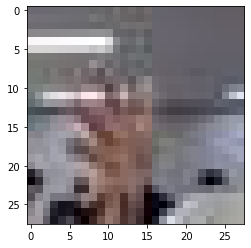

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1649])
print('라벨: ', y_train[1649])

## 딥러닝 네트워크 설계
데이터의 준비 완료, 네트워크 설계

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                25616     
_________________________________________________________________
dense_5 (Dense)              (

결과

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
57/57 [==============================] - 0s 4ms/step - loss: 1.0653 - accuracy: 0.4456
Epoch 2/15
57/57 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.6756
Epoch 3/15
57/57 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7756
Epoch 4/15
57/57 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8117
Epoch 5/15
57/57 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8589
Epoch 6/15
57/57 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.8911
Epoch 7/15
57/57 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.9117
Epoch 8/15
57/57 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9250
Epoch 9/15
57/57 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9328
Epoch 10/15
57/57 [==============================] - 0s 4ms/step - loss: 0.1589 - accuracy: 0.9444
Epoch 11/15
57/57 [

Model Train

모델 테스트를 하기 위해 test 데이터를 구성 총 150장씩 450장으로 구함

In [18]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=450   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test_data/a"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 450 입니다.
x_test shape: (450, 28, 28, 3)
y_test shape: (450,)


test_accuarcy 측정

In [19]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

15/15 - 0s - loss: 0.8398 - accuracy: 0.6933
test_loss: 0.8398156762123108 
test_accuracy: 0.6933333277702332


### 결과에 대한 이유 및 고찰 내용
---
일단 처음 100장씩 교육했었을 때는 30%대의 인식율을 나타냈기 때문에 Data 개수의 문제가 있다고 판단했습니다.    
Slack에서 외부의 자료를 받아 2000장 가깝게 재교육을 했으나 외부의 자료와 webcam을 통해 직접 마련한 DataSet의 배경도 그렇고 외부자료의    이미지 형태가 문제점이 많았기 때문에 인식률은 크게 개선되지 않았고, 따라서 외부자료는 다시 삭제하고 조원들의 데이터를 추가하여 최종적으로    
**Training Data 1800장**

**Test Data 450장**

으로 정해서 진행했습니다.

Train data와 Test Data간의 차이가 심하면 인식률이 떨어져서 최대한 랜덤하게 나눠서 데이터셋을 처리했습니다.
데이터 셋을 더 추가하거나 아니면 딥러닝 모델을 고도화 하는 측면 혹은 이미지 데이터의 전처리를 통해 픽셀값을 좀 더 크게 한다면 인식률이 더 좋아질 것이라고 판단하고 있습니다.